<div>
<p style="text-align:center">
<img src="./src/logo DatosAbiertos.jpg">
</p>
</div>

# **Población Identificada con DNI mayor de edad por condición de donante de órganos**
### **Segundo Semestre - 2023**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

### **Importar Dataset del Portal Nacional de Datos Abiertos**

In [6]:
data = pd.read_csv("./src/data/16_OPP_2023_Jun_donacion_0.csv", delimiter=",")
data.head()

,Residencia,Cod_continente,Continente,CodPais,Pais,UBIGEO_RENIEC,UBIGEO_INEI,Departamento,Provincia,Distrito,Sexo,Edad,Donacion,Cantidad
0,Nacional,92,América,9233,Perú,10101,10101,Amazonas,Chachapoyas,Chachapoyas,Hombre,0,No Especificado,277
1,Nacional,92,América,9233,Perú,10101,10101,Amazonas,Chachapoyas,Chachapoyas,Hombre,1,No Especificado,329
2,Nacional,92,América,9233,Perú,10101,10101,Amazonas,Chachapoyas,Chachapoyas,Hombre,2,No Especificado,314
3,Nacional,92,América,9233,Perú,10101,10101,Amazonas,Chachapoyas,Chachapoyas,Hombre,3,No Especificado,342
4,Nacional,92,América,9233,Perú,10101,10101,Amazonas,Chachapoyas,Chachapoyas,Hombre,4,No Especificado,352


### **Importar Dataset Geográfico por Departamento del Perú**

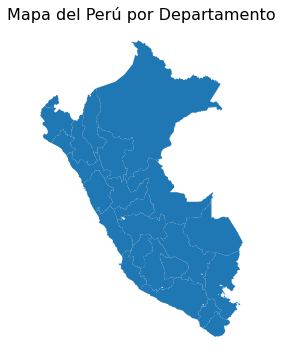

In [16]:
geodata = gpd.read_file('./src/geoData/DEPARTAMENTOS.shp')
fig, ax = plt.subplots(figsize = (8,6))
geodata.plot(ax = ax)
for i in ['bottom', 'left']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tick_params(axis='both', which='both', length=0)
plt.xticks([])
plt.yticks([])
plt.title("Mapa del Perú por Departamento", size = 16)
plt.show()

## **Análisis Exploratorio de Datos - Parte I**

In [4]:
# Determinar si existen valores nulos
print(data.isnull().sum())
print("##########################")
print("No existen valores nulos")

Residencia        0
Cod_continente    0
Continente        0
CodPais           0
Pais              0
UBIGEO_RENIEC     0
UBIGEO_INEI       0
Departamento      0
Provincia         0
Distrito          0
Sexo              0
Edad              0
Donacion          0
Cantidad          0
dtype: int64
##########################
No existen valores nulos


In [5]:
# Revisar tipo de dato
data.dtypes

Residencia        object
Cod_continente     int64
Continente        object
CodPais            int64
Pais              object
UBIGEO_RENIEC     object
UBIGEO_INEI       object
Departamento      object
Provincia         object
Distrito          object
Sexo              object
Edad               int64
Donacion          object
Cantidad           int64
dtype: object

## **Análisis Exploratorio de Datos - Parte II**

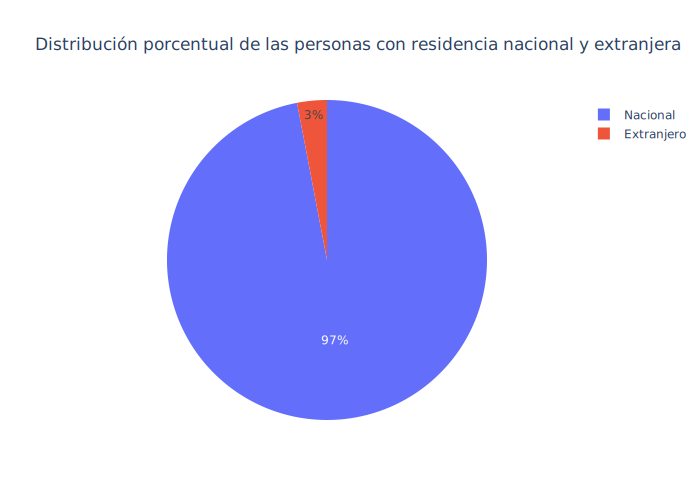

In [49]:
df1 = pd.DataFrame(data.Residencia.value_counts().apply(lambda x : round(x / data.Residencia.count() * 100)))
df1 = df1.rename(columns = {'Residencia':'% Personas Residencia'})
fig = px.pie(df1, values="% Personas Residencia" ,names=df1.index,
             title = 'Distribución porcentual de las personas con residencia nacional y extranjera')
fig.show('svg')